In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

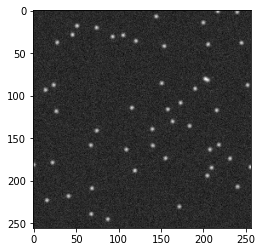

In [3]:
data = np.load("data/data.npy")
data = (data - np.min(data)) / np.ptp(data)

plt.imshow(data[0], cmap="gray")
plt.show()

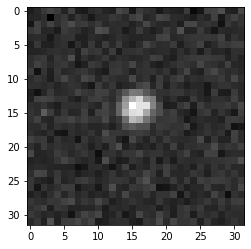

In [4]:
crop = data[0, 100:132, 100:132]
plt.imshow(crop, cmap="gray")

In [5]:
training_data = dt.Value(crop)

In [6]:
model = dt.models.AutoMultiTracker(input_shape=(None, None, 1))

In [7]:
model.fit(training_data, epochs=30, batch_size=8)

Generating 184 / 160 samples before starting training
Epoch 1/30
184/184 [==============================] - 3s 7ms/step - total_loss: 1.0433 - consistency_loss: 0.4682
Epoch 2/30
184/184 [==============================] - 2s 11ms/step - total_loss: 0.0603 - consistency_loss: 0.0062
Epoch 3/30
184/184 [==============================] - 2s 11ms/step - total_loss: 0.0529 - consistency_loss: 0.0044
Epoch 4/30
184/184 [==============================] - 2s 11ms/step - total_loss: 0.0450 - consistency_loss: 0.0037
Epoch 5/30
184/184 [==============================] - 2s 11ms/step - total_loss: 0.0399 - consistency_loss: 0.0040
Epoch 6/30
184/184 [==============================] - 2s 8ms/step - total_loss: 0.0412 - consistency_loss: 0.0036
Epoch 7/30
184/184 [==============================] - 2s 12ms/step - total_loss: 0.0454 - consistency_loss: 0.0040
Epoch 8/30
184/184 [==============================] - 2s 12ms/step - total_loss: 0.0352 - consistency_loss: 0.0035
Epoch 9/30
184/184 [========

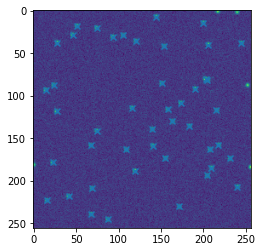

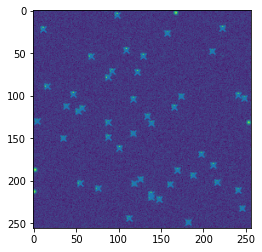

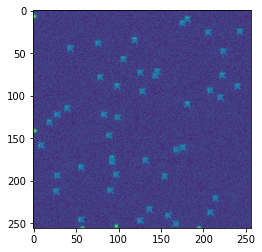

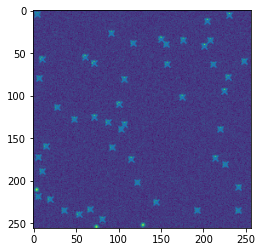

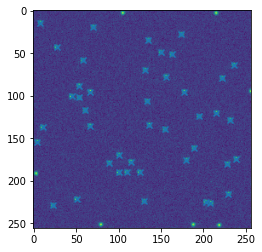

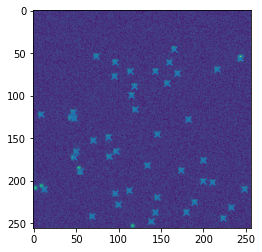

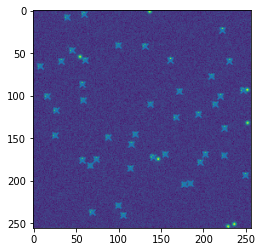

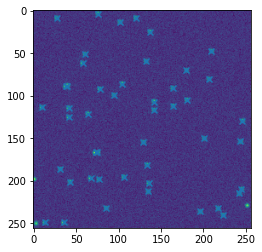

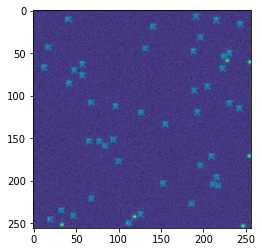

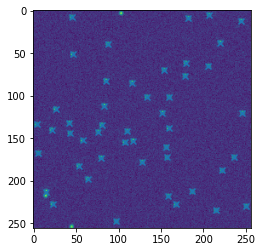

In [8]:
all_detections = model.predict_and_detect(data)

for frame, frame_detections in zip(data, all_detections):
    plt.imshow(frame)
    plt.scatter(frame_detections[:, 1], frame_detections[:, 0], marker="x")
    plt.show()